In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/home/mahaputra971/pt_skp/dlv_agoda_reviews.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reviewer_name       295 non-null    object
 1   user_country        288 non-null    object
 2   room_type           295 non-null    object
 3   stay_duration_days  295 non-null    object
 4   rating              295 non-null    object
 5   review_text         295 non-null    object
 6   review_date         267 non-null    object
dtypes: object(7)
memory usage: 16.3+ KB


In [51]:
df.head(10)

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Sayza,Malaysia,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 1 malam pada Mei 2024,"8,4",Saya menginap di Daun Lebar Villas untuk bulan...,NaN
1,Faiz,Indonesia,Deluxe One Bedroom Private Pool Villa,Menginap 2 malam pada Agustus 2025,"10,0",Kami memiliki pengalaman menginap yang sangat ...,NaN
2,VINKA,Indonesia,Vila Tiga Kamar Tidur,Menginap 1 malam pada Juli 2025,"6,4","Dengan harga ***, saya mendapat kamar dan perl...",Diulas pada 15 Juli 2025
3,Katerina,Singapura,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 4 malam pada Mei 2023,"9,6","Lokasi jauh dari bandara, memakan waktu 2,5 ja...",NaN
4,Lovish,India,Vila Tiga Kamar Tidur,Menginap 4 malam pada Desember 2023,"10,0",Kami memiliki tinggal yang luar biasa di prope...,NaN
5,Kristopher,Indonesia,Deluxe One Bedroom Private Pool Villa,Menginap 2 malam pada Juli 2025,"10,0","Tempatnya berada di tengah desa, yang sangat t...",NaN
6,Destiny,Australia,Vila Dua Kamar Tidur dengan Kolam Renang,Menginap 4 malam pada Agustus 2025,"2,8",Vila ini adalah yang terburuk yang pernah kami...,NaN
7,Daniel,Indonesia,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 1 malam pada Oktober 2024,"10,0","Terletak di tempat yang tidak terlalu ramai, t...",NaN
8,earl,Amerika Serikat,Vila Tiga Kamar Tidur,Menginap 1 malam pada Desember 2024,"8,0","Untuk memulai, saya sangat senang dengan masa ...",NaN
9,Nattapak,Thailand,Vila Dua Kamar Tidur dengan Kolam Renang,Menginap 5 malam pada September 2025,"7,6","Kamar sangat bagus untuk harganya, tempat tidu...",NaN


In [52]:
# 1. Bersihkan awalan "Diulas pada " di kolom review_date
# Kita gunakan regex=False agar proses lebih cepat karena teksnya pasti
df['review_date'] = df['review_date'].str.replace('Diulas pada ', '', regex=False)

# 2. Ambil Bulan dan Tahun dari kolom 'stay_duration_days' untuk mengisi NaN
# Pola regex: cari kata setelah 'pada ' sampai akhir string
# Contoh: "Menginap 1 malam pada Mei 2024" -> akan diambil "Mei 2024"
extracted_dates = df['stay_duration_days'].str.extract(r'pada\s+(.*)', expand=False)

# 3. Isi data NaN di 'review_date' dengan hasil ekstraksi tersebut
df['review_date'] = df['review_date'].fillna(extracted_dates)

# 4. TERJEMAHKAN Bulan Indonesia ke Inggris
# Ini langkah krusial agar pd.to_datetime tidak error membaca "Juli", "Mei", "Agustus", dll.
map_bulan = {
    'Januari': 'January',
    'Februari': 'February',
    'Maret': 'March',
    'April': 'April',
    'Mei': 'May',
    'Juni': 'June',
    'Juli': 'July',
    'Agustus': 'August',
    'September': 'September',
    'Oktober': 'October',
    'November': 'November',
    'Desember': 'December'
}

# Lakukan replace string
for idn, eng in map_bulan.items():
    # Pastikan data string sebelum direplace
    df['review_date'] = df['review_date'].astype(str).str.replace(idn, eng, regex=False)

# 5. Konversi ke Datetime
# errors='coerce' akan mengubah data yang tetap error menjadi NaT (Not a Time) daripada menghentikan program
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# Cek hasil
print("Tipe data:", df['review_date'].dtypes)
print("\nContoh data hasil konversi:")
print(df['review_date'].head())

# Cek apakah masih ada yang error/NaT
print(f"\nJumlah data yang gagal diparsing (NaT): {df['review_date'].isna().sum()}")

Tipe data: datetime64[ns]

Contoh data hasil konversi:
0   2024-05-01
1   2025-08-01
2   2025-07-15
3   2023-05-01
4   2023-12-01
Name: review_date, dtype: datetime64[ns]

Jumlah data yang gagal diparsing (NaT): 0


/tmp/ipykernel_62003/3927931249.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')


In [53]:
df.head() 

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date
0,Sayza,Malaysia,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 1 malam pada Mei 2024,"8,4",Saya menginap di Daun Lebar Villas untuk bulan...,2024-05-01
1,Faiz,Indonesia,Deluxe One Bedroom Private Pool Villa,Menginap 2 malam pada Agustus 2025,"10,0",Kami memiliki pengalaman menginap yang sangat ...,2025-08-01
2,VINKA,Indonesia,Vila Tiga Kamar Tidur,Menginap 1 malam pada Juli 2025,"6,4","Dengan harga ***, saya mendapat kamar dan perl...",2025-07-15
3,Katerina,Singapura,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 4 malam pada Mei 2023,"9,6","Lokasi jauh dari bandara, memakan waktu 2,5 ja...",2023-05-01
4,Lovish,India,Vila Tiga Kamar Tidur,Menginap 4 malam pada Desember 2023,"10,0",Kami memiliki tinggal yang luar biasa di prope...,2023-12-01


In [54]:
def plot_barplot(data, x_col, y_col, title="", format_number="", x_label="", y_label="", colour_bar_set="3"):
    plt.figure(figsize=(10, max(6, len(data) * 0.4))) # Tinggi otomatis menyesuaikan banyaknya negara

    # --- 1. DETEKSI OTOMATIS: VERTIKAL ATAU HORIZONTAL? ---
    # Jika Y-nya angka, berarti Vertikal. Jika Y-nya teks, berarti Horizontal.
    if pd.api.types.is_numeric_dtype(data[y_col]):
        orientation = 'vertical'
        color_basis = data[y_col] # Warna ikut tinggi Y
    else:
        orientation = 'horizontal'
        color_basis = data[x_col] # Warna ikut panjang X (Jumlah)

    # --- 2. LOGIKA WARNA ---
    if colour_bar_set == "1": # Tinggi=Hijau
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    elif colour_bar_set == "2": # Tinggi=Merah
        norm = plt.Normalize(color_basis.min(), color_basis.max())
        sm = plt.cm.ScalarMappable(cmap="RdYlGn_r", norm=norm)
        colors = [sm.to_rgba(val) for val in color_basis]
    else: # Mode 3 (Default Biru - Aman untuk Kategori)
        colors = ["#4c72b0"] * len(data)
        sm = None

    # --- 3. MEMBUAT PLOT ---
    barplot = sns.barplot(
        x=x_col, 
        y=y_col,
        data=data,
        palette=colors,
        hue=y_col if orientation == 'horizontal' else x_col, # Fix warning seaborn baru
        legend=False
    )

    # --- 4. MEMBERI LABEL ANGKA (SMART POSITIONING) ---
    for bar in barplot.patches:
        # Ambil dimensi batang
        width = bar.get_width()
        height = bar.get_height()
        
        # Tentukan nilai yang akan ditulis
        value = width if orientation == 'horizontal' else height
        if np.isnan(value): continue

        # Format label
        if isinstance(value, float):
            label_text = f"{format_number}{value:.2f}"
            if value.is_integer(): label_text = f"{format_number}{int(value)}"
        else:
            label_text = f"{format_number}{int(value)}"

        # Tentukan posisi teks
        if orientation == 'horizontal':
            # Jika horizontal, teks ditaruh di sebelah kanan ujung batang
            text_x = width + (data[x_col].max() * 0.01) # Beri sedikit jarak
            text_y = bar.get_y() + height / 2
            ha_align = 'left'
            color_text = 'black' # Teks hitam biar terbaca di background putih
        else:
            # Jika vertikal, teks ditaruh di tengah/atas batang
            text_x = bar.get_x() + width / 2
            text_y = bar.get_y() + height / 2
            ha_align = 'center'
            color_text = 'white'

        plt.text(
            text_x, 
            text_y, 
            label_text, 
            va='center', 
            ha=ha_align, 
            fontsize=10, 
            color=color_text, 
            weight='bold'
        )

    # Kosmetik
    plt.title(title, loc="center", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label if y_label else y_col, fontsize=12)
    
    if orientation == 'vertical':
        plt.grid(axis='y', linestyle='--', alpha=0.3)
    else:
        plt.grid(axis='x', linestyle='--', alpha=0.3) # Grid X untuk horizontal

    plt.tight_layout()
    plt.show()

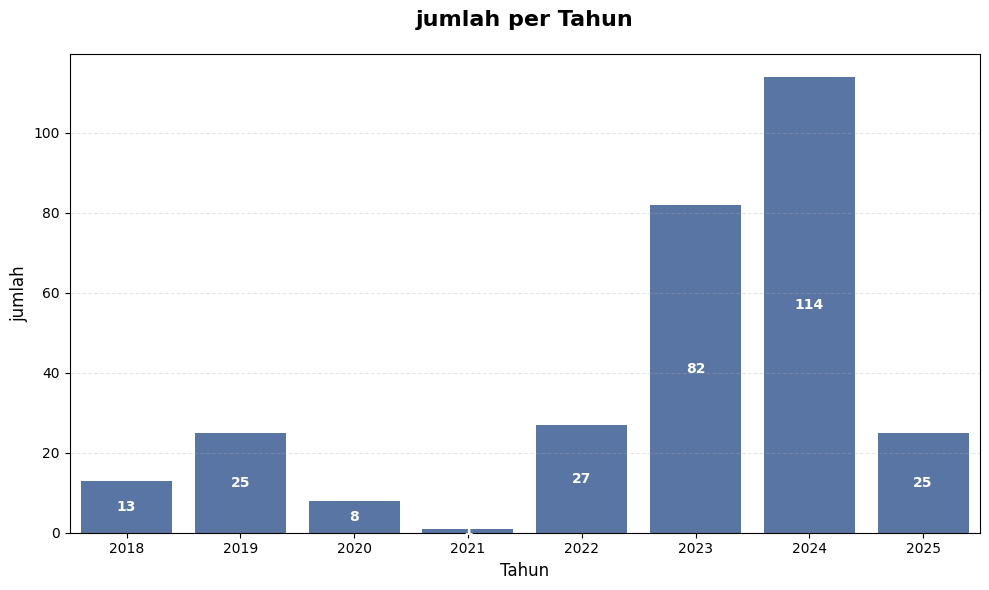

,tahun,jumlah
0,2018,13
1,2019,25
2,2020,8
3,2021,1
4,2022,27
5,2023,82
6,2024,114
7,2025,25


In [55]:
# --- 1. DATA PREPARATION ---

# Pastikan kolom tanggal bertipe datetime
# Jika format tanggalmu beda (misal: "12 Dec 2023"), pandas biasanya otomatis mengenali
df['review_date'] = pd.to_datetime(df['review_date'])

# Ekstrak tahun ke kolom baru
df['year'] = df['review_date'].dt.year

# Hitung jumlah review per tahun dan URUTKAN BERDASARKAN TAHUN (sort_index)
# Kita pakai sort_index() agar tahunnya urut (2020, 2021, 2022...), bukan acak.
year_counts = df['year'].value_counts().sort_index()

# Konversi ke DataFrame agar mudah di-plot seaborn
year_df = year_counts.reset_index()
year_df.columns = ['tahun', 'jumlah']

# --- 2. VISUALISASI (Best Practice) ---

plot_barplot(
    data=year_df, 
    x_col="tahun", 
    y_col="jumlah", 
    title="jumlah per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

year_df

In [56]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Sayza,Malaysia,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 1 malam pada Mei 2024,"8,4",Saya menginap di Daun Lebar Villas untuk bulan...,2024-05-01,2024
1,Faiz,Indonesia,Deluxe One Bedroom Private Pool Villa,Menginap 2 malam pada Agustus 2025,"10,0",Kami memiliki pengalaman menginap yang sangat ...,2025-08-01,2025
2,VINKA,Indonesia,Vila Tiga Kamar Tidur,Menginap 1 malam pada Juli 2025,"6,4","Dengan harga ***, saya mendapat kamar dan perl...",2025-07-15,2025
3,Katerina,Singapura,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 4 malam pada Mei 2023,"9,6","Lokasi jauh dari bandara, memakan waktu 2,5 ja...",2023-05-01,2023
4,Lovish,India,Vila Tiga Kamar Tidur,Menginap 4 malam pada Desember 2023,"10,0",Kami memiliki tinggal yang luar biasa di prope...,2023-12-01,2023
...,...,...,...,...,...,...,...,...
290,JENNIFER,Australia,Vila 1 Kamar Tidur dengan Kolam Renang,Menginap 3 malam pada Juli 2023,"8,0",Lovely villa \nGreat food at restaurant,2023-08-06,2023
291,Lisbeth,Australia,Vila Dua Kamar Tidur dengan Kolam Renang,Menginap 3 malam pada Juli 2023,"2,0",I was terrible disappointing for me and my fri...,2023-07-31,2023
292,Nina,Indonesia,Vila Tiga Kamar Tidur,Menginap 2 malam pada Januari 2023,"9,2","Beautiful , comfy, clean",2023-01-25,2023
293,Thulasi,Malaysia,Deluxe One Bedroom Private Pool Villa,Menginap 3 malam pada Agustus 2023,"6,0","No room slippers, bathroom was dirty. It’s ver...",2023-08-30,2023


In [57]:
# 1. Ekstrak hanya angkanya saja dari teks "Menginap 1 malam pada..."
# Regex r'(\d+)' akan mengambil digit pertama yang ditemukan
df['stay_duration_days'] = df['stay_duration_days'].astype(str).str.extract(r'(\d+)', expand=False)

# 2. Ubah menjadi tipe data Integer
# Kita gunakan pd.to_numeric dengan errors='coerce' untuk keamanan
df['stay_duration_days'] = pd.to_numeric(df['stay_duration_days'], errors='coerce')

# 3. Handling NaN & Konversi ke int
# Jika ada data kosong/gagal (misal "Menginap semalam"), kita bisa isi dengan nilai default (misal 1)
# lalu diubah ke integer
df['stay_duration_days'] = df['stay_duration_days'].fillna(1).astype(int)

# Cek hasil
print(df['stay_duration_days'].head())
print(df['stay_duration_days'].dtypes)

0    1
1    2
2    1
3    4
4    4
Name: stay_duration_days, dtype: int64
int64


Jumlah data rating yang valid: 295
Contoh data rating: 0     8.4
1    10.0
2     6.4
3     9.6
4    10.0
Name: rating, dtype: float64

Data yang akan di-plot:
   year     rating
0  2018   8.307692
1  2019   7.440000
2  2020   9.000000
3  2021  10.000000
4  2022   8.977778
5  2023   8.053659
6  2024   7.484211
7  2025   8.624000


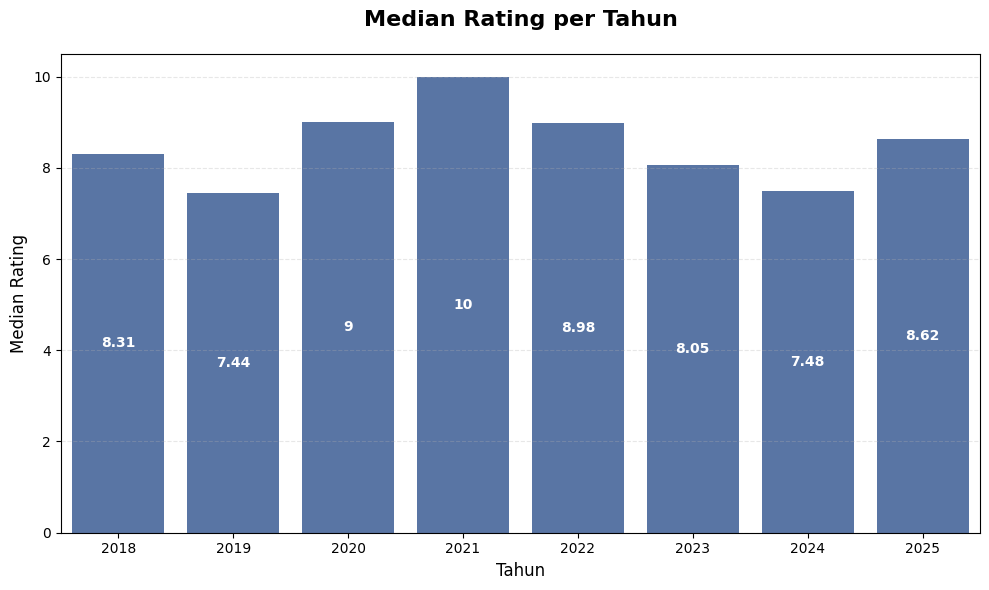

In [58]:
import pandas as pd

# 1. Ganti Koma menjadi Titik (PENTING)
# Kita ubah dulu ke string, ganti koma, baru konversi ke numerik
df['rating'] = df['rating'].astype(str).str.replace(',', '.', regex=False)

# 2. Bersihkan karakter non-angka (jika ada teks seperti '/5')
# Kita ambil hanya bagian angkanya saja
df['rating'] = df['rating'].str.extract(r'(\d+\.?\d*)', expand=False)

# 3. Konversi ke Float
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# 4. Pastikan kolom 'year' terbentuk dengan benar dari review_date
df['year'] = df['review_date'].dt.year

# --- CEK DATA (DEBUGGING) ---
print("Jumlah data rating yang valid:", df['rating'].notna().sum())
print("Contoh data rating:", df['rating'].head())

# Buat dataset untuk plot
plot_data = df.reset_index().groupby('year')['rating'].mean().reset_index(name='rating')

# Cek isi data yang mau di-plot
print("\nData yang akan di-plot:")
print(plot_data)

# --- PLOT ULANG ---
# Hanya plot jika datanya ada
if not plot_data.empty and plot_data['rating'].count() > 0:
    plot_barplot(
        data=plot_data, 
        x_col="year", 
        y_col="rating", 
        title="Median Rating per Tahun", 
        x_label="Tahun",
        y_label="Median Rating",
        colour_bar_set="3"
    )
else:
    print("Data kosong! Cek kembali format kolom 'rating' Anda.")

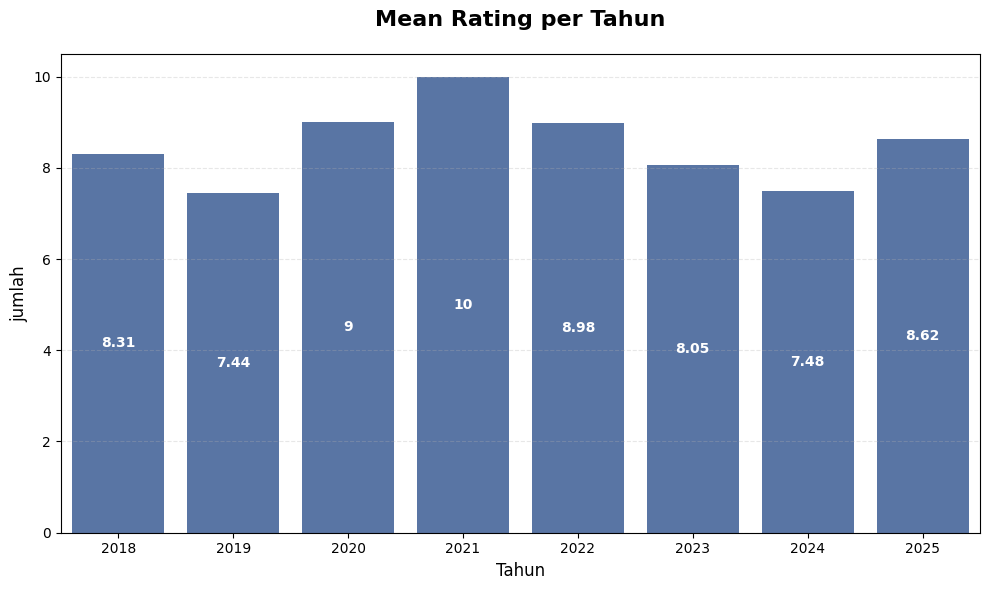

In [59]:

plot_barplot(
    data=df.reset_index().groupby('year').rating.mean().reset_index(name='rating'), 
    x_col="year", 
    y_col="rating", 
    title="Mean Rating per Tahun", 
    x_label="Tahun",
    y_label="jumlah",
    colour_bar_set="3" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

## 2. Text Mining

In [60]:
# Pastikan nama kolom tahun sesuai (misal 'Year' atau 'year')
# zip menggabungkan dua kolom menjadi pasangan
review_with_year = list(zip(df['year'], df['review_text']))

# Cek 5 data pertama
print(review_with_year)

[(2024, 'Saya menginap di Daun Lebar Villas untuk bulan madu saya pada Mei 2024, dan itu benar-benar pengalaman yang meny愠kan.\n\nFasilitas dan makanan sangat baik, dan secara keseluruhan, menawarkan nilai yang bagus untuk uang. Meskipun vila terletak cukup jauh dari kota dan toko, dan rutenya bisa sedikit sulit, jarak ini membuat lingkungan tenang dan damai — sempurna untuk pelarian yang santai.\n\nStafnya ramah dan membantu, dan kebersihan vila umumnya baik. Namun, toilet memiliki sedikit bau; akan lebih baik jika manajemen bisa menyediakan penyegar udara untuk memperbaiki hal itu.\n\nSecara keseluruhan, menginap saya di Daun Lebar Villas sangat menyenankan. Saya sangat merekomendasikannya untuk siapa saja yang mencari vila dengan kolam renang pribadi dan suasana yang tenang dengan harga yang wajar.'), (2025, 'Kami memiliki pengalaman menginap yang sangat luar biasa di Vila. Pengalaman tersebut benar-benar tak terlupakan -- Kamarnya mengagumkan dan bersih, luas, nyaman, dan dirancang

## 3. user_country

                user_country  jumlah
8                  Indonesia     114
17                  Malaysia      32
23                 Singapura      31
7                      India      21
3                  Australia      15
15             Korea Selatan      10
6                  Hong Kong       9
28                  Thailand       5
27                    Taiwan       5
22             Selandia Baru       4
19                   Prancis       4
1            Amerika Serikat       4
33                   Vietnam       3
5                   Filipina       3
10                    Jepang       3
9                    Inggris       3
32           Uni Emirat Arab       2
2                 Arab Saudi       2
4                    Belanda       2
24                   Spanyol       2
25                    Swedia       1
31                   Ukraina       1
30                     Turki       1
29               Timor Leste       1
26                     Swiss       1
13                    Kanada       1
1

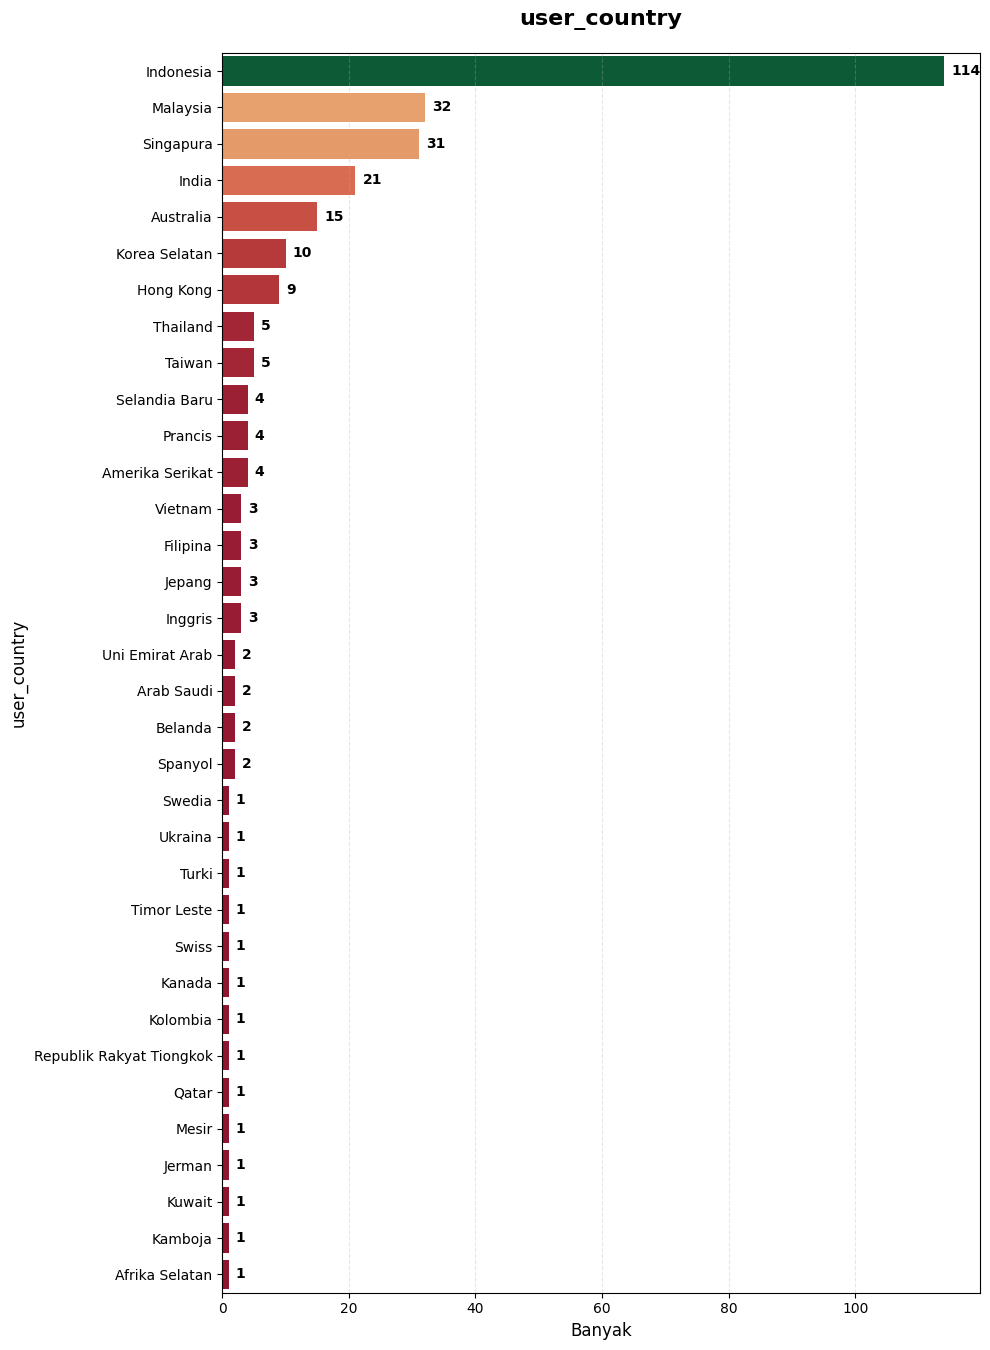

In [61]:
''' 
Membuat sort list dan visualisasi banyak orang tiap user_country
'''
count_gender = df.groupby('user_country').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="user_country", 
    title="user_country",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

                                   room_type  jumlah
3   Vila Dua Kamar Tidur dengan Kolam Renang     107
2     Vila 1 Kamar Tidur dengan Kolam Renang      97
4                      Vila Tiga Kamar Tidur      60
0      Deluxe One Bedroom Private Pool Villa      30
1  Kategori Kamar ditentukan saat Kedatangan       1


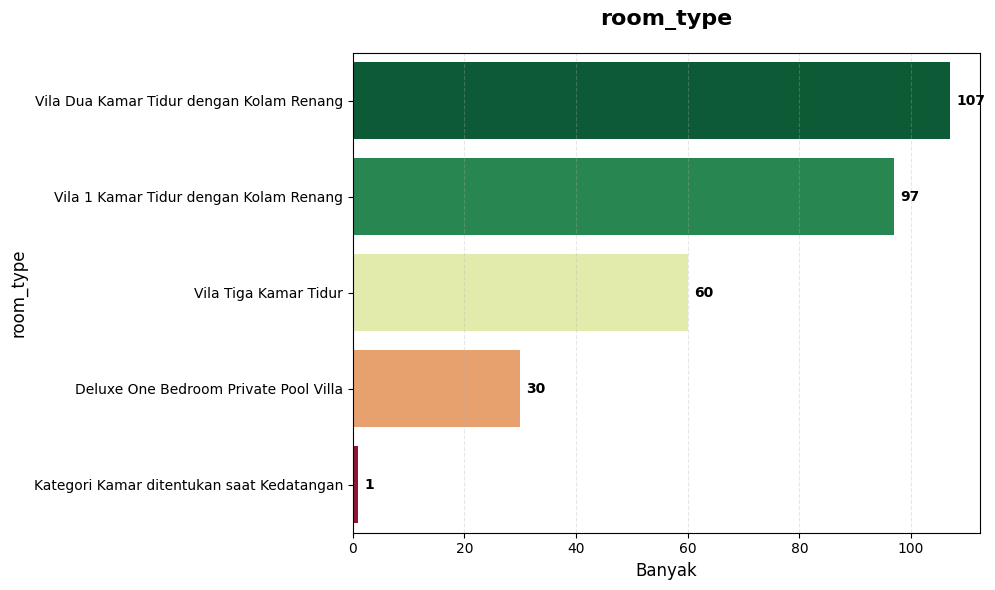

In [62]:
''' 
Membuat sort list dan visualisasi banyak orang tiap room_view
'''
count_gender = df.groupby('room_type').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="jumlah",
    y_col="room_type", 
    title="room_type",
    format_number="",
    x_label="Banyak",
    colour_bar_set="1"
)

   stay_duration_days  jumlah
1                   2     116
0                   1      92
2                   3      58
3                   4      20
4                   5       3
6                   7       3
5                   6       2
7                  21       1


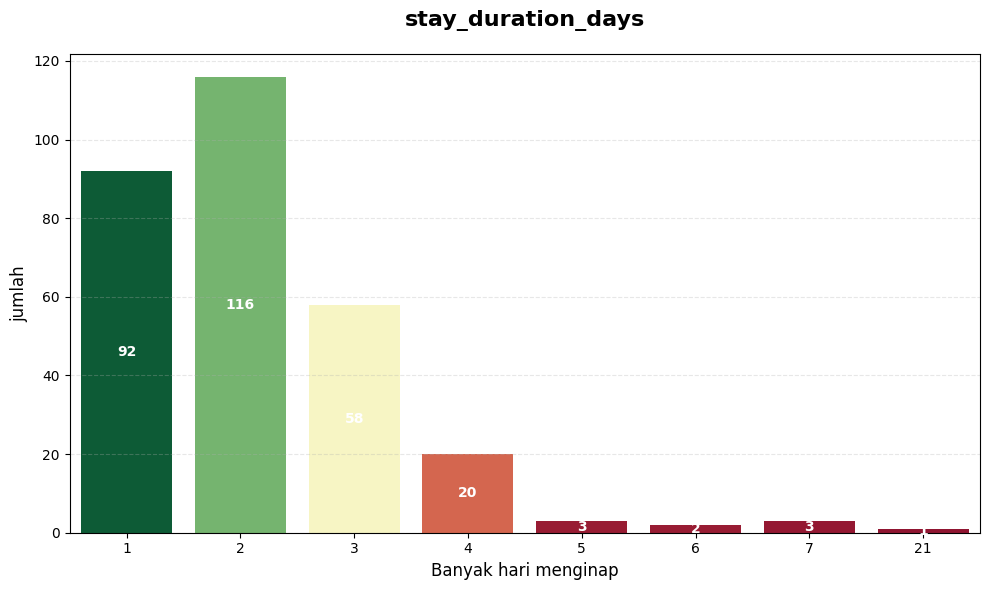

In [63]:
''' 
Membuat sort list dan visualisasi banyak orang tiap stay_duration_days
'''
count_gender = df.groupby('stay_duration_days').size().reset_index(name='jumlah').sort_values(by='jumlah', ascending=False)
print(count_gender)  
plot_barplot(
    data=count_gender,
    x_col="stay_duration_days",
    y_col="jumlah", 
    title="stay_duration_days",
    format_number="",
    x_label="Banyak hari menginap",
    colour_bar_set="1"
)

In [64]:
def plot_multivariate_barplot(df, x_col, hue_col, title="", x_label="", y_label="Jumlah", top_n_hue=5, palette="viridis"):
    """
    Fungsi template Grouped Bar Chart + Garis Tren (FIXED ALIGNMENT).
    """
    
    # --- 1. DATA PREPARATION ---
    data_grouped = df.groupby([x_col, hue_col]).size().reset_index(name='counts')

    # --- 2. FILTER TOP N ---
    top_categories = df[hue_col].value_counts().nlargest(top_n_hue).index.tolist()
    data_filtered = data_grouped[data_grouped[hue_col].isin(top_categories)].copy() # Gunakan .copy() agar aman
    
    # [PENTING] Urutkan berdasarkan Tahun agar garis tidak zig-zag
    data_filtered = data_filtered.sort_values(by=x_col)
    
    # [PENTING] Ubah Tahun menjadi String agar dianggap KATEGORI (bukan angka 0-2000)
    data_filtered[x_col] = data_filtered[x_col].astype(str)

    # --- 3. PRINT TABEL ---
    print("\n" + "="*60)
    print(f"📊 DATA TABEL: {title}")
    print(f"(Hanya menampilkan Top {top_n_hue} kategori '{hue_col}')")
    print("="*60)
    
    try:
        table_view = data_filtered.pivot(index=x_col, columns=hue_col, values='counts').fillna(0).astype(int)
        print(table_view)
    except Exception as e:
        print(f"Gagal membuat tabel pivot: {e}")

    print("-" * 60 + "\n")

    # --- 4. VISUALISASI ---
    plt.figure(figsize=(12, 6))
    
    # LAYER 1: BAR PLOT
    sns.barplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=palette,
        edgecolor='black',
        linewidth=0.5,
        alpha=0.5 # Transparan agar garis terlihat jelas
    )

    # LAYER 2: POINT PLOT (Pengganti Lineplot)
    # Pointplot otomatis mensejajarkan titik tepat di tengah batang kategori
    sns.pointplot(
        data=data_filtered,
        x=x_col,
        y='counts',
        hue=hue_col,
        palette=palette,
        markers="o",      # Titik bulat
        linestyles="-",   # Garis sambung
        scale=0.7,        # Ukuran titik
        errorbar=None     # Matikan error bar
    )

    # Kosmetik Grafik
    plt.title(title, fontsize=16, fontweight='bold', pad=15)
    plt.xlabel(x_label if x_label else x_col, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    
    # Perbaiki Legend (Hapus duplikat karena ada 2 plot)
    handles, labels = plt.gca().get_legend_handles_labels()
    # Ambil setengah pertama saja (milik barplot)
    plt.legend(handles[:len(top_categories)], labels[:len(top_categories)], title=hue_col, title_fontsize='11', fontsize='10')
    
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.xticks(rotation=0) 
    plt.tight_layout()
    plt.show()


📊 DATA TABEL: Tren Durasi Menginap per Tahun
(Hanya menampilkan Top 4 kategori 'stay_duration_days')
stay_duration_days   1   2   3  4
year                             
2018                 5   5   0  3
2019                11   9   2  2
2020                 4   4   0  0
2021                 1   0   0  0
2022                 8  13   2  3
2023                19  36  19  6
2024                38  36  32  4
2025                 6  13   3  2
------------------------------------------------------------



/tmp/ipykernel_62003/606699496.py:50: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


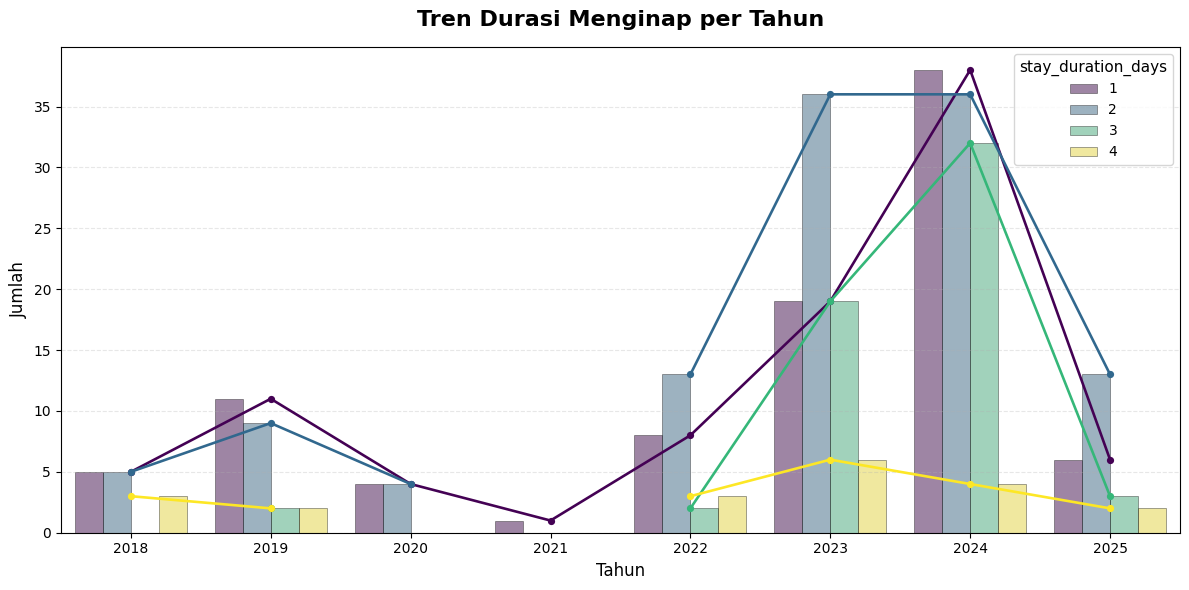

In [65]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="stay_duration_days", # Ganti dengan nama kolom hasil regex tadi
    title="Tren Durasi Menginap per Tahun",
    x_label="Tahun",
    top_n_hue=4 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)


📊 DATA TABEL: Tren segmen market negara per Tahun
(Hanya menampilkan Top 4 kategori 'user_country')
user_country  India  Indonesia  Malaysia  Singapura
year                                               
2018              0          4         1          2
2019              0          1         5          5
2020              0          5         0          1
2021              0          1         0          0
2022              2         16         1          3
2023              5         33         8         10
2024             10         42        14         10
2025              4         12         3          0
------------------------------------------------------------



/tmp/ipykernel_62003/606699496.py:50: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


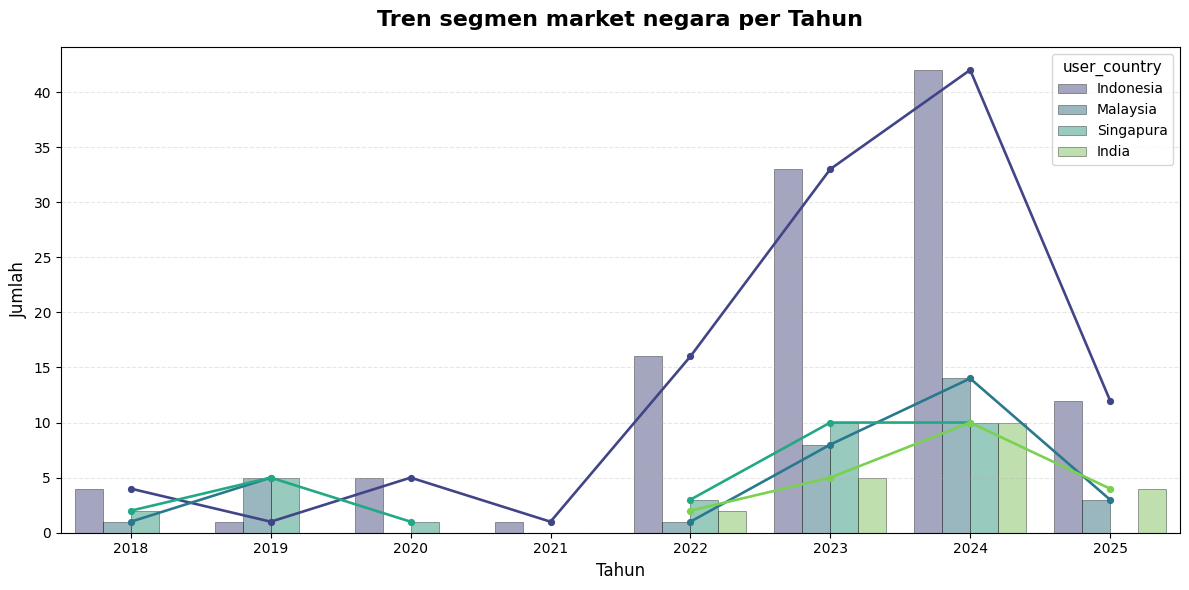

In [66]:
plot_multivariate_barplot(
    df=df,
    x_col="year",
    hue_col="user_country", # Ganti dengan nama kolom hasil regex tadi
    title="Tren segmen market negara per Tahun",
    x_label="Tahun",
    top_n_hue=4 # Hanya ambil 4 durasi terpopuler (misal 1, 2, 3, 4 malam)
)

In [67]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Sayza,Malaysia,Vila 1 Kamar Tidur dengan Kolam Renang,1,8.4,Saya menginap di Daun Lebar Villas untuk bulan...,2024-05-01,2024
1,Faiz,Indonesia,Deluxe One Bedroom Private Pool Villa,2,10.0,Kami memiliki pengalaman menginap yang sangat ...,2025-08-01,2025
2,VINKA,Indonesia,Vila Tiga Kamar Tidur,1,6.4,"Dengan harga ***, saya mendapat kamar dan perl...",2025-07-15,2025
3,Katerina,Singapura,Vila 1 Kamar Tidur dengan Kolam Renang,4,9.6,"Lokasi jauh dari bandara, memakan waktu 2,5 ja...",2023-05-01,2023
4,Lovish,India,Vila Tiga Kamar Tidur,4,10.0,Kami memiliki tinggal yang luar biasa di prope...,2023-12-01,2023
...,...,...,...,...,...,...,...,...
290,JENNIFER,Australia,Vila 1 Kamar Tidur dengan Kolam Renang,3,8.0,Lovely villa \nGreat food at restaurant,2023-08-06,2023
291,Lisbeth,Australia,Vila Dua Kamar Tidur dengan Kolam Renang,3,2.0,I was terrible disappointing for me and my fri...,2023-07-31,2023
292,Nina,Indonesia,Vila Tiga Kamar Tidur,2,9.2,"Beautiful , comfy, clean",2023-01-25,2023
293,Thulasi,Malaysia,Deluxe One Bedroom Private Pool Villa,3,6.0,"No room slippers, bathroom was dirty. It’s ver...",2023-08-30,2023


                                   room_type    rating
3   Vila Dua Kamar Tidur dengan Kolam Renang  7.693458
0      Deluxe One Bedroom Private Pool Villa  8.026667
4                      Vila Tiga Kamar Tidur  8.060000
2     Vila 1 Kamar Tidur dengan Kolam Renang  8.148454
1  Kategori Kamar ditentukan saat Kedatangan  9.600000


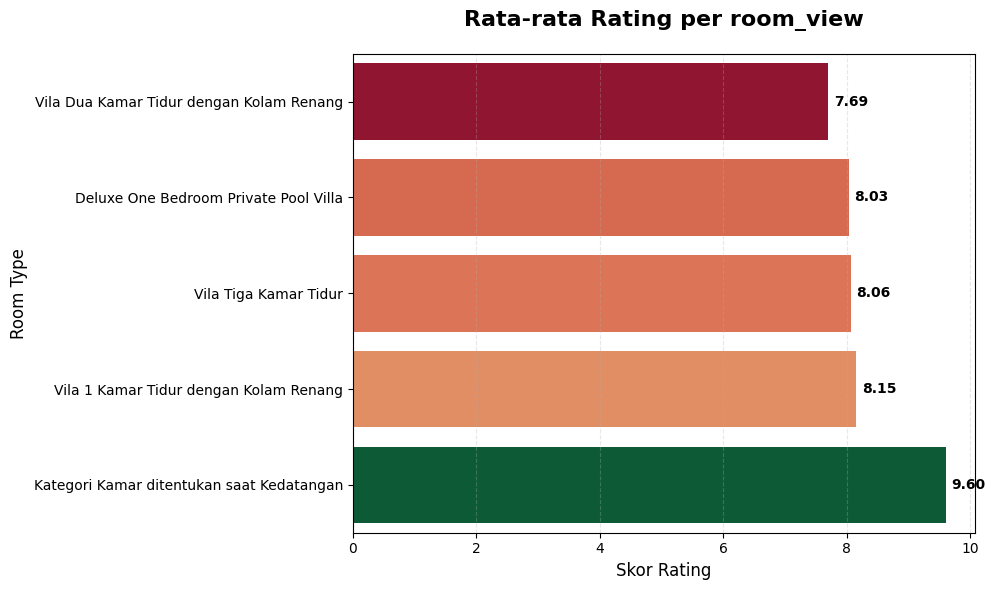

In [68]:
# Reset index agar 'Year' kembali menjadi kolom
rating_room_year = df.groupby('room_type')['rating'].mean().reset_index()

rating_room_year = rating_room_year[rating_room_year!= 0]

# Opsional: Urutkan tahun biar rapi
rating_room_year = rating_room_year.sort_values('rating')

print(rating_room_year)

# --- CARA PENGGUNAAN ---
plot_barplot(
    data=rating_room_year , 
    x_col="rating", 
    y_col="room_type", 
    title="Rata-rata Rating per room_view", 
    x_label="Skor Rating",
    y_label="Room Type",
    colour_bar_set="1" # Gunakan 3 (Biru) untuk data tahunan agar netral
)

In [69]:
filtered_df = df[df['review_text'] != 0].copy()
# Baru di-grouping
dislike_by_room_view = filtered_df.groupby('room_type')['review_text'].apply(list)

# --- CARA MENGAKSES HASILNYA (Sama seperti kodemu) ---
print("=== Statistik Dislike per Kamar ===")
for room_type, comments in dislike_by_room_view.items():
    print(f"Pada {room_type}: Ditemukan {len(comments)} komentar.")
    print(f"{comments}") 
    print("-" * 30)

=== Statistik Dislike per Kamar ===
Pada Deluxe One Bedroom Private Pool Villa: Ditemukan 30 komentar.
['Kami memiliki pengalaman menginap yang sangat luar biasa di Vila. Pengalaman tersebut benar-benar tak terlupakan -- Kamarnya mengagumkan dan bersih, luas, nyaman, dan dirancang dengan indah.\n\nAkses ke vila sedikit menantang, tapi sangat berharga.\n\nStafnya ramah dan membantu. Secara keseluruhan, saya merekomendasikan Daun Lebar Villas kepada siapa pun yang mencari tempat berlibur yang menyenangkan dan menenangkan.', 'Tempatnya berada di tengah desa, yang sangat tenang dan damai. Anginnya sejuk dan nyaman. Stafnya semua sangat baik dan ramah. Bahkan ketika saya lupa memberi tahu bahwa saya harus bangun sangat pagi dan butuh dijemput, mereka masih memberi saya jemputan pada jam 5 pagi.\n\nMakanan enak dan lezat!\n\nSecara keseluruhan, saya menikmati bulan madu kami di sini selama 3 hari 2 malam!', 'Kamar pertama yang kami inap cukup buruk, tidak seindah yang terlihat di foto. Kursi

In [70]:
df

,reviewer_name,user_country,room_type,stay_duration_days,rating,review_text,review_date,year
0,Sayza,Malaysia,Vila 1 Kamar Tidur dengan Kolam Renang,1,8.4,Saya menginap di Daun Lebar Villas untuk bulan...,2024-05-01,2024
1,Faiz,Indonesia,Deluxe One Bedroom Private Pool Villa,2,10.0,Kami memiliki pengalaman menginap yang sangat ...,2025-08-01,2025
2,VINKA,Indonesia,Vila Tiga Kamar Tidur,1,6.4,"Dengan harga ***, saya mendapat kamar dan perl...",2025-07-15,2025
3,Katerina,Singapura,Vila 1 Kamar Tidur dengan Kolam Renang,4,9.6,"Lokasi jauh dari bandara, memakan waktu 2,5 ja...",2023-05-01,2023
4,Lovish,India,Vila Tiga Kamar Tidur,4,10.0,Kami memiliki tinggal yang luar biasa di prope...,2023-12-01,2023
...,...,...,...,...,...,...,...,...
290,JENNIFER,Australia,Vila 1 Kamar Tidur dengan Kolam Renang,3,8.0,Lovely villa \nGreat food at restaurant,2023-08-06,2023
291,Lisbeth,Australia,Vila Dua Kamar Tidur dengan Kolam Renang,3,2.0,I was terrible disappointing for me and my fri...,2023-07-31,2023
292,Nina,Indonesia,Vila Tiga Kamar Tidur,2,9.2,"Beautiful , comfy, clean",2023-01-25,2023
293,Thulasi,Malaysia,Deluxe One Bedroom Private Pool Villa,3,6.0,"No room slippers, bathroom was dirty. It’s ver...",2023-08-30,2023


/tmp/ipykernel_62003/3179651340.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = df.set_index(date_col).resample('M').size()


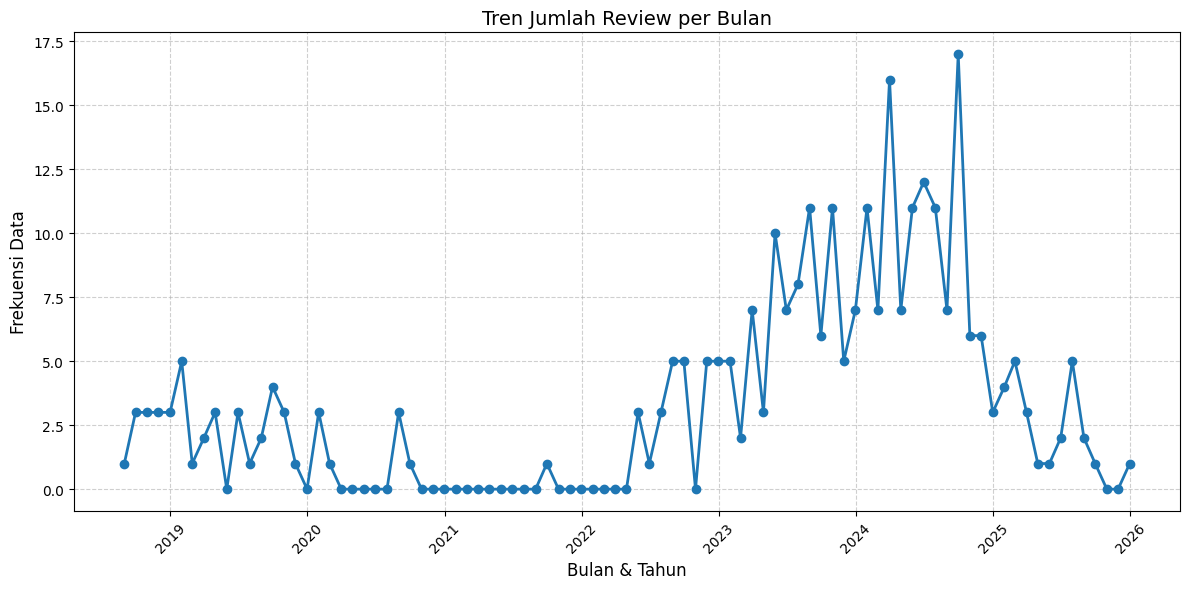

review_date
2024-09-30    17
2024-03-31    16
2024-06-30    12
2024-07-31    11
2023-08-31    11
              ..
2021-12-31     0
2022-01-31     0
2022-02-28     0
2022-03-31     0
2022-04-30     0
Length: 89, dtype: int64

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Pastikan kolom tanggal dikenali sebagai datetime
# Ganti 'published_at_date' dengan 'review_post_date' jika Anda sudah merename kolomnya
date_col = 'review_date' 
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# 2. Resample data per Bulan (M) dan hitung jumlahnya (.size())
# Kita set tanggal sebagai index dulu agar bisa di-resample
monthly_counts = df.set_index(date_col).resample('M').size()

# 3. Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='#1f77b4', linewidth=2)

# Mempercantik tampilan
plt.title(f'Tren Jumlah Review per Bulan', fontsize=14)
plt.xlabel('Bulan & Tahun', fontsize=12)
plt.ylabel('Frekuensi Data', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()

# Tampilkan
plt.show()
monthly_counts.sort_values(ascending=False)

--- Total Data Per Bulan (Akumulasi Semua Tahun) ---
review_date
September    38
August       31
January      28
March        28
July         28
May          25
June         25
October      23
November     20
December     19
February     16
April        14
Name: count, dtype: int64


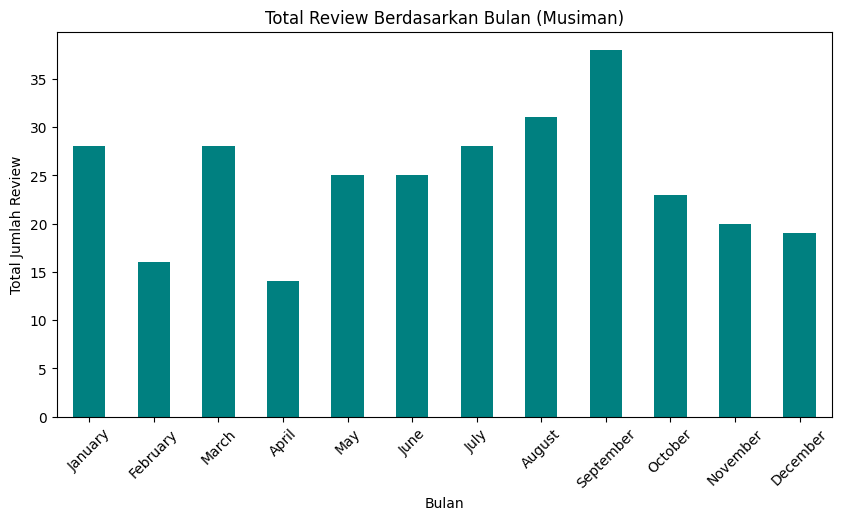

In [72]:
import pandas as pd

# 1. Pastikan kolom target sudah format datetime
col_name = 'review_date'  # Sesuaikan nama kolom tanggal Anda
df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

# 2. Urutan bulan yang benar (agar tidak terurut abjad April duluan)
bulan_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# 3. Ambil nama bulan dan hitung
# dt.month_name() mengambil nama bulan (Jan, Feb, dst) mengabaikan tahun
monthly_counts = df[col_name].dt.month_name().value_counts()

# 4. Urutkan hasil sesuai kalender (bukan jumlah terbanyak)
monthly_counts = monthly_counts.reindex(bulan_order, fill_value=0)

# 5. Tampilkan Hasil
print("--- Total Data Per Bulan (Akumulasi Semua Tahun) ---")
print(monthly_counts.sort_values(ascending=False))

# --- Opsional: Tampilkan dalam Grafik Batang ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='bar', color='teal')
plt.title('Total Review Berdasarkan Bulan (Musiman)')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Review')
plt.xticks(rotation=45)
plt.show()